C:\Users\ysyss\AppData\Local\Temp\ipykernel_19468\3502309408.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')


AttributeError: module 'matplotlib.pyplot' has no attribute 'DateFormatter'

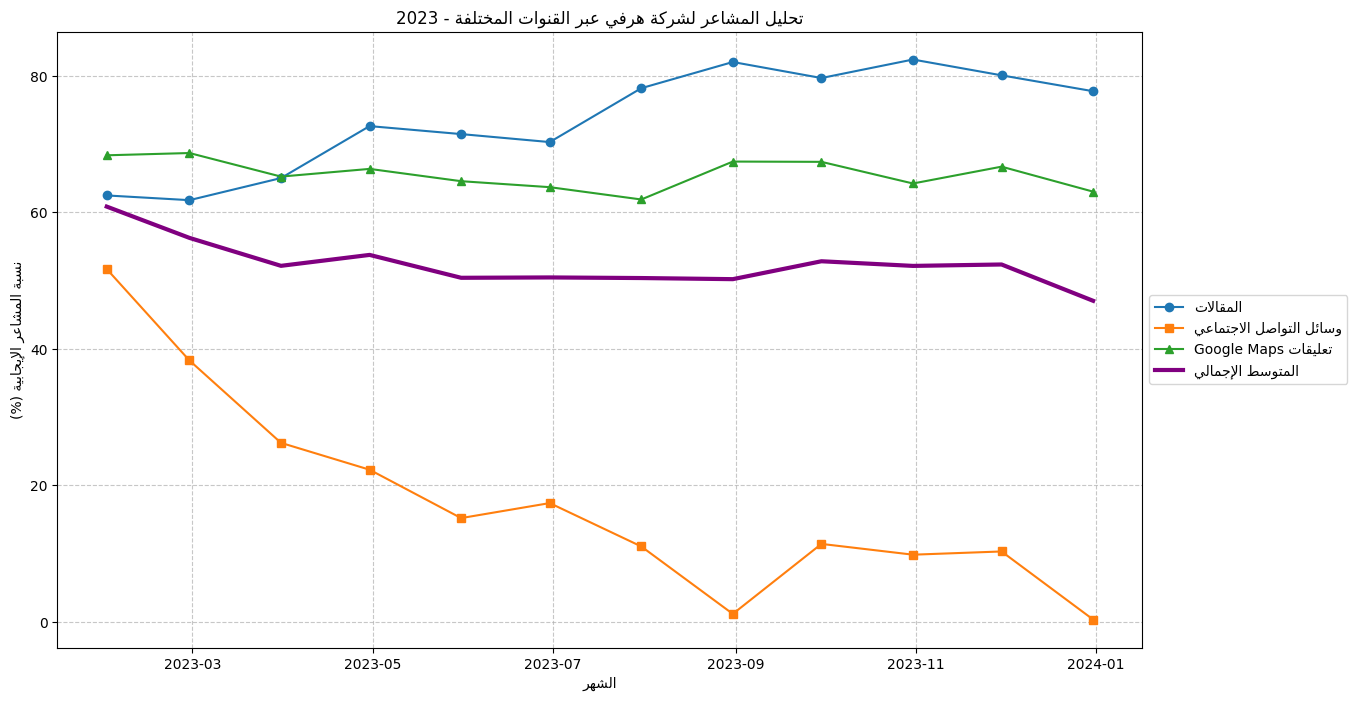

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from arabic_reshaper import reshape
from bidi.algorithm import get_display

def arabic_text(text):
    reshaped_text = reshape(text)
    return get_display(reshaped_text)

# إنشاء بيانات تخيلية
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
np.random.seed(42)

# إنشاء نسب إيجابية تخيلية لكل مصدر (0 إلى 1)
articles = np.clip(0.6 + np.cumsum(np.random.randn(len(dates)) * 0.05), 0, 1)
social_media = np.clip(0.5 + np.cumsum(np.random.randn(len(dates)) * 0.07), 0, 1)
google_maps = np.clip(0.7 + np.cumsum(np.random.randn(len(dates)) * 0.03), 0, 1)

# حساب المتوسط الإجمالي
overall = (articles + social_media + google_maps) / 3

# إنشاء DataFrame
df = pd.DataFrame({
    'التاريخ': dates,
    'المقالات': articles,
    'وسائل التواصل الاجتماعي': social_media,
    'تعليقات Google Maps': google_maps,
    'المتوسط الإجمالي': overall
})

# إنشاء الرسم البياني
plt.figure(figsize=(14, 8))
plt.plot(df['التاريخ'], df['المقالات'] * 100, label=arabic_text('المقالات'), marker='o')
plt.plot(df['التاريخ'], df['وسائل التواصل الاجتماعي'] * 100, label=arabic_text('وسائل التواصل الاجتماعي'), marker='s')
plt.plot(df['التاريخ'], df['تعليقات Google Maps'] * 100, label=arabic_text('تعليقات Google Maps'), marker='^')
plt.plot(df['التاريخ'], df['المتوسط الإجمالي'] * 100, label=arabic_text('المتوسط الإجمالي'), linewidth=3, color='purple')

plt.title(arabic_text('تحليل المشاعر لشركة فيه قطاع المطاعم عبر القنوات المختلفة - 2023'))
plt.xlabel(arabic_text('الشهر'))
plt.ylabel(arabic_text('نسبة المشاعر الإيجابية (%)'))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.7)

# تنسيق المحور السيني
plt.gca().xaxis.set_major_formatter(plt.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

# تعيين حدود المحور Y من 0 إلى 100
plt.ylim(0, 100)

# إضافة خط عند 50% للتمييز بين الإيجابية والسلبية الغالبة
plt.axhline(y=50, color='r', linestyle='--', linewidth=1)
plt.text(dates[0], 51, arabic_text('حد التعادل'), color='r', va='bottom', ha='left')

# تحسين التخطيط
plt.tight_layout()

# عرض الرسم البياني
plt.show()